In [164]:
import numpy as np
import cv2
import pandas as pd
import imutils
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

In [168]:
image = cv2.imread('/Users/rohansambidi/Downloads/visual-sudoku-puzzle-classification-main/scripts/train.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

chunks = [np.split(chunk,9,axis=1) for chunk in np.split(gray_blur,9)]

sudoku_digits = np.zeros(shape=(81, 28, 28), dtype = int)

In [169]:
gray_blur.shape

(369, 369)

In [175]:
image = cv2.imread('/Users/rohansambidi/Downloads/visual-sudoku-puzzle-classification-main/scripts/puzzles/1.jpg')
image = cv2.resize(image, dsize=(368, 368), interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

print(gray_blur.shape)
chunks = [np.split(chunk,4,axis=1) for chunk in np.split(gray_blur,4)]

sudoku_digits = np.zeros(shape=(16, 28, 28), dtype = int)

(368, 368)


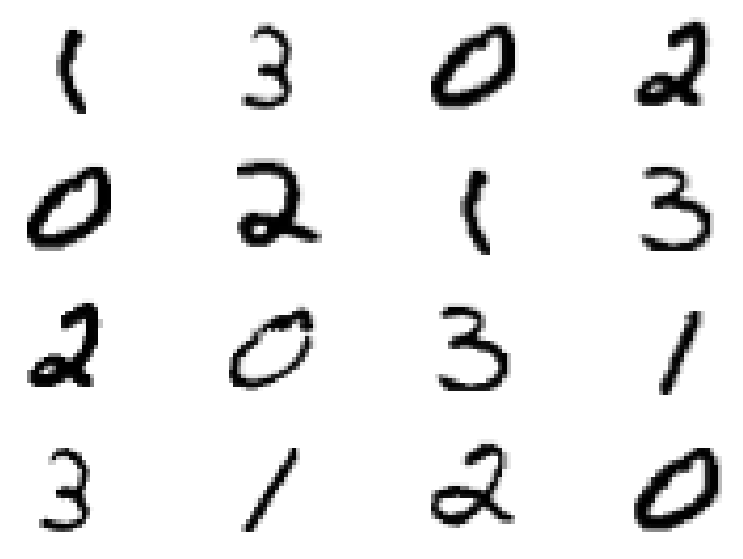

In [176]:
fig =plt.figure(figsize=(10, 7))

c=0

#s=[]
for i in chunks:
    for j in i:
        #s.append(j.shape)
        img = 255 - cv2.resize(j, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
        img[img < 10] = 0
        
        sudoku_digits[c] = img
        
        fig.add_subplot(4, 4, c+1)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.axis('off')
        
        c+=1

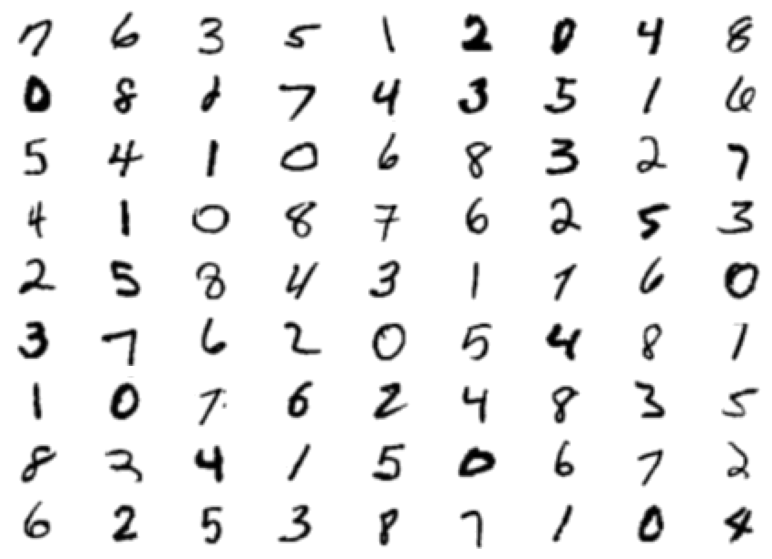

In [44]:
fig =plt.figure(figsize=(10, 7))

c=0

#s=[]
for i in chunks:
    for j in i:
        #s.append(j.shape)
        img = 255 - cv2.resize(j, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
        img[img < 10] = 0
        
        sudoku_digits[c] = img
        
        fig.add_subplot(9, 9, c+1)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.axis('off')
        
        c+=1

In [177]:
pd.DataFrame(sudoku_digits[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
sudoku_digits_with_chanels = sudoku_digits.reshape(sudoku_digits.shape[0], 28, 28, 1)

sudoku_digits_normalized = sudoku_digits_with_chanels / 255

In [51]:
sudoku_cnn_model = load_model('digits_recognition_cnn.h5')

In [179]:
predictions_one_hot = sudoku_cnn_model.predict([sudoku_digits_normalized])

1/1 [==============================] - 0s 219ms/step


In [181]:
predictions = np.argmax(predictions_one_hot, axis=1)
predictions_reshaped = predictions.reshape((4,4))

In [182]:
predictions

array([1, 3, 0, 2, 0, 2, 1, 3, 2, 0, 3, 1, 3, 1, 2, 0])

In [183]:
predictions_reshaped

array([[1, 3, 0, 2],
       [0, 2, 1, 3],
       [2, 0, 3, 1],
       [3, 1, 2, 0]])

In [150]:
'''recognized_digits = np.zeros(shape=(9,9), dtype = int)
for i in range(9):
    for j in range(9):
        sorted_pred = np.argsort(predictions_one_hot[i*9+j])
        c = -1
        recognized_digits[i,j] = sorted_pred[c]
'''

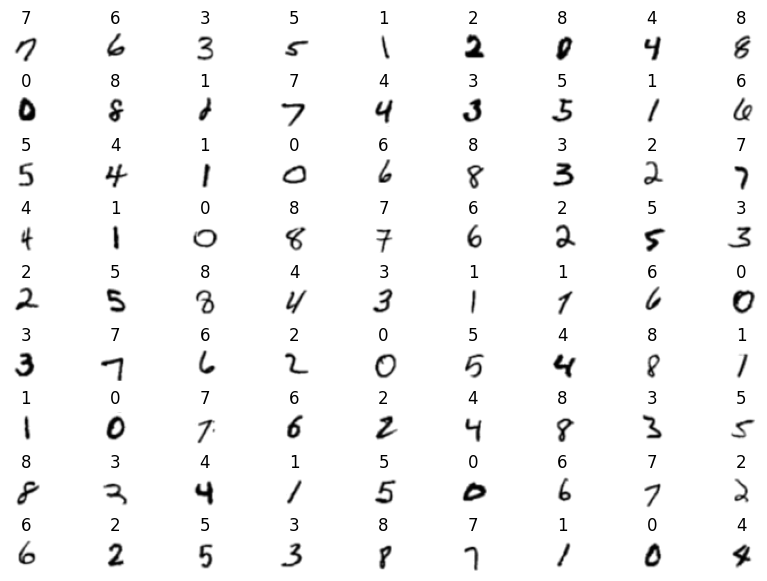

In [160]:
fig = plt.figure(figsize=(10, 7))

for plot_index in range(81):    
    predicted_label = predictions[plot_index]
    #color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(9, 9, plot_index + 1)
    plt.imshow(sudoku_digits_normalized[plot_index], cmap = plt.cm.binary)
    plt.axis('off')
    plt.title(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()
fig.savefig('fig.jpg', bbox_inches='tight', pad_inches=0)

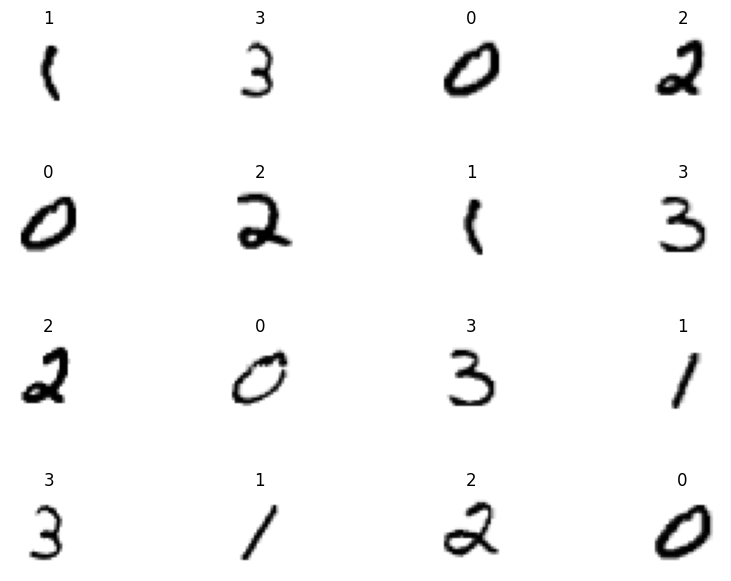

In [184]:
fig = plt.figure(figsize=(10, 7))

for plot_index in range(16):    
    predicted_label = predictions[plot_index]
    #color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(4, 4, plot_index + 1)
    plt.imshow(sudoku_digits_normalized[plot_index], cmap = plt.cm.binary)
    plt.axis('off')
    plt.title(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()
fig.savefig('fig.jpg', bbox_inches='tight', pad_inches=0)

In [ ]:
pl_9 = """:- use_module(library(clpfd)).

sudoku(Rows) :-
        length(Rows, 9), maplist(same_length(Rows), Rows),
        append(Rows, Vs), Vs ins 1..9,
        maplist(all_distinct, Rows),
        transpose(Rows, Columns),
        maplist(all_distinct, Columns),
        Rows = [As,Bs,Cs,Ds,Es,Fs,Gs,Hs,Is],
        blocks(As, Bs, Cs),
        blocks(Ds, Es, Fs),
        blocks(Gs, Hs, Is).

blocks([], [], []).
blocks([N1,N2,N3|Ns1], [N4,N5,N6|Ns2], [N7,N8,N9|Ns3]) :-
        all_distinct([N1,N2,N3,N4,N5,N6,N7,N8,N9]),
        blocks(Ns1, Ns2, Ns3).

problem(1, [[_,9,_,_,_,5,_,_,_],
[4,2,1,_,_,_,_,_,9],
[8,_,5,4,9,2,_,_,6],
[_,_,_,_,1,4,_,_,_],
[_,_,8,_,_,9,6,_,_],
[1,_,_,6,2,_,_,_,_],
[7,_,_,2,_,6,9,_,8],
[5,_,_,_,_,_,2,6,1],
[9,_,_,8,_,_,_,3,_]]).
"""

In [ ]:
with open("Output.txt", "w") as text_file:
    text_file.write("Purchase Amount: %s" % TotalAmount)

In [187]:
predictions

array([1, 3, 0, 2, 0, 2, 1, 3, 2, 0, 3, 1, 3, 1, 2, 0])

In [1]:
from pyswip import Prolog

In [189]:
prolog = Prolog()
prolog.consult("/Users/rohansambidi/Downloads/sudoku_4x4.pl")

ERROR: atom_chars/2: Arguments are not sufficiently instantiated


PrologError: Caused by: 'consult('/Users/rohansambidi/Downloads/sudoku_4x4.pl')'. Returned: 'error(instantiation_error, context(:(system, /(atom_chars, 2)), _654))'.

In [2]:
prolog = Prolog()
prolog.assertz("father(michael,john)")

ERROR: atom_chars/2: Arguments are not sufficiently instantiated


PrologError: Caused by: 'assertz((father(michael,john))).'. Returned: 'error(instantiation_error, context(:(system, /(atom_chars, 2)), _654))'.

In [191]:
from swiplserver import PrologMQI, PrologThread

with PrologMQI() as mqi:
    with mqi.create_thread() as prolog_thread:
        result = prolog_thread.query("atom(a)")
        print(result)

True


In [4]:
!python3 --version

Python 3.11.1
